# Shape Generation Problem

In [1]:
from random import random
import numpy as np
import pandas as pd
from keras.layers import LSTM, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline


Using TensorFlow backend.


In [2]:
def random_rectangle():
    width, height = random(), random()
    points = []
    #append bottom left
    points.append([0.0, 0.0])
    #append bottom right
    points.append([width, 0.0])
    #append top right
    points.append([width, height])
    #append botttom right
    points.append([0.0, height])
    
    return points

In [3]:
rectangle = random_rectangle()
# close the rectangle path
rectangle.append(rectangle[0])
# define path for plotting
rectangle

[[0.0, 0.0],
 [0.9073141378886914, 0.0],
 [0.9073141378886914, 0.09095106492385263],
 [0.0, 0.09095106492385263],
 [0.0, 0.0]]

In [4]:
def plot_rectangle(r):
    r.append(r[0])
    w = r[1][0]
    h = r[2][1]
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.add_patch(patches.Rectangle((0, 0), w, h,
                                   linewidth = 2, edgecolor = 'magenta',
                                    facecolor = 'none'))
    ax1.set_xlim(-0.1,1.1)
    ax1.set_ylim(-0.1,1.1)

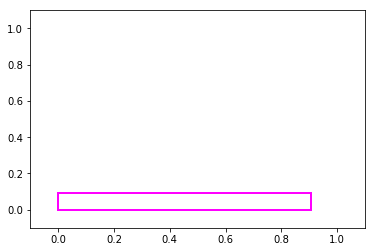

In [5]:
plot_rectangle(rectangle)

In [6]:
def get_samples():
    rectangle = random_rectangle()
    X, y = [], []
    
    for i in range(1, len(rectangle)):
        X.append(rectangle[i-1])
        y.append(rectangle[i])
    
    X, y = np.array(X), np.array(y)
    X = X.reshape((X.shape[0], 1, 2))
    return X, y

In [7]:
X, y = get_samples()
for i in range(X.shape[0]):
    print(X[i][0], '=>', y[i])

[ 0.  0.] => [ 0.64168174  0.        ]
[ 0.64168174  0.        ] => [ 0.64168174  0.69221406]
[ 0.64168174  0.69221406] => [ 0.          0.69221406]


In [ ]:
model = Sequential()

model.add(LSTM(10, input_shape=(1, 2)))
model.add(Dense(2, activation='linear'))
model.compile(loss='mae', optimizer='adam')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                520       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 542
Trainable params: 542
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for i in range(25000):
    X, y = get_samples()
    model.fit(X, y, epochs=1, verbose=0, shuffle=False)

In [ ]:
def generate_rectangle(model):
    rectangle = []
    # use [0,0] for first point
    last = np.array([0.0,0.0]).reshape((1, 1, 2))
    rectangle.append([[y for y in x] for x in last[0]][0])
    # generate the remaining 3 coordinates
    for i in range(3):
        # predict the next coordinate
        yhat = model.predict(last, verbose=0)
        # use this output as input for the next prediction
        last = yhat.reshape((1, 1, 2))
        # store coordinate
        rectangle.append([[y for y in x] for x in last[0]][0])
    return rectangle

In [ ]:
generated_rectangle = generate_rectangle(model)
plot_rectangle(generated_rectangle)